In [14]:
import random
import time
from queue import Queue

In [15]:
def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v

    return wrapper


In [16]:
class FSM:
    def __init__(self, prnt=True) -> None:
        self.events = Queue()
        self.time = 0
        self.level_of_motivation = random.choice(
            range(6)
        )  # Each morning you have a random amount of motivation
        self.food_level = 1
        self.study_time = 0
        self.prnt = prnt

        self.waking_up = self._create_waking_up()
        self.studying = self._create_studying()
        self.sports = self._create_sport_activity()
        self.youtube = self._create_watching_youtube()
        self.eating = self._create_eating()
        self.sleep = self._create_sleeping()

        self.current_state = self.sleep

    def send(self, event, time):
        if self.prnt:
            self.printing(f"{time}:00", starting="\n")
        if event:
            if self.prnt:
                self.printing(f"*{event}*")
            if event == "Sudden burst of motivation":
                self.level_of_motivation += 8
            elif event == "Sudden attack of boredom":
                self.level_of_motivation = 0
        self.current_state.send(event)
        self.time += 1

    def printing(self, string, starting="") -> None:
        print(starting)
        for char in string:
            print(char, end="", flush=True)
            time.sleep(0.1)

    @prime
    def _create_sleeping(self):
        while True:
            event = yield

            if 7 >= self.time >= 0:
                if self.time == 7:
                    self.current_state = self.waking_up
                else:
                    self.current_state = self.sleep
                if event == "Air Alarm":
                    if self.prnt:
                        self.printing("Never mind, I'm still sleeping... 😴")
                else:
                    if self.prnt:
                        self.printing("Sleeping... 😴")

    @prime
    def _create_waking_up(self):
        while True:
            event = yield

            if not event:
                if self.prnt:
                    self.printing(
                        f"Good Morning, new day - new me!\nI need to eat something..."
                    )
                self.current_state = self.eating
            else:
                if event == "Air Alarm":
                    if self.prnt:
                        self.printing("I'll sleep for another hour 😴")
                    self.current_state = self.waking_up
                elif event == "Sudden attack of boredom":
                    if self.prnt:
                        self.printing("I'll sleep for another hour 😴")
                    self.current_state = self.waking_up
                else:
                    if self.prnt:
                        self.printing(
                            "Good Morning, I'm full of energy! Let's have a breakfast."
                        )
                    self.current_state = self.eating

    @prime
    def _create_eating(self):
        while True:
            event = yield

            if self.time == 23:
                if self.prnt:
                    self.printing(
                        f"It's time to go to bed 😴\nHours spent learning: {self.study_time}"
                    )
                self.current_state = self.sleep
            else:
                if not event:
                    self.food_level += 6
                    if self.prnt:
                        self.printing("It's time to have a meal!")
                    self.study_state()
                else:
                    if event == "Air Alarm":
                        if self.prnt:
                            self.printing(
                                "I can't eat in the Trapezna :(\nLet's wait for the alarm to go off."
                            )
                        self.current_state = self.eating
                    elif event == "Sudden attack of boredom":
                        self.food_level += 6
                        if self.prnt:
                            self.printing(
                                "Ahhh, even eating in boring, I need to do something interesting!"
                            )
                        self.random_activity_state()
                    else:
                        self.food_level += 6
                        if self.prnt:
                            self.printing("It's time to have a meal!")
                        self.study_state()

    @prime
    def _create_studying(self):
        while True:
            event = yield

            if self.time == 23:
                if self.prnt:
                    self.printing(
                        f"It's time to go to bed 😴\nHours spent studying: {self.study_time}"
                    )
                self.current_state = self.sleep
            else:
                self.food_level -= 1
                if not event:
                    if self.food_level >= 1:
                        if self.level_of_motivation >= 2:
                            if self.prnt:
                                self.printing("It's time for studying 👨‍🎓")
                            self.level_of_motivation -= 2
                            self.study_time += 1
                            self.study_state()
                        else:
                            if self.prnt:
                                self.printing(
                                    "Not enough motivation ☹\nLet's do something else!"
                                )
                            self.random_activity_state()
                    else:
                        if self.prnt:
                            self.printing(
                                "I can't study any more, I'm hungry ☹\nLet's eat something!"
                            )
                        self.current_state = self.eating
                else:
                    if event == "Air Alarm":
                        if self.prnt:
                            self.printing("I'll study in the shelter!")
                        self.level_of_motivation -= 3
                        self.study_time += 1
                        self.study_state()
                    elif event == "Sudden attack of boredom":
                        if self.prnt:
                            self.printing(
                                "Studying... I'm sick of studying...\nLet's do something more interesting!"
                            )
                        self.study_time += 1
                        self.random_activity_state()
                    else:
                        if self.prnt:
                            self.printing("I'm so motivated\nLet's continue studying!")
                        self.study_state()

    @prime
    def _create_sport_activity(self):
        while True:
            event = yield

            if self.time == 23:
                if self.prnt:
                    self.printing(
                        f"It's time to go to bed 😴\nHours spent learning: {self.study_time}"
                    )
                self.current_state = self.sleep
            else:
                if self.prnt:
                    self.printing("Let's do some pull-ups!")
                if not event:
                    self.level_of_motivation += 10
                    self.food_level -= 3
                    self.study_state()
                else:
                    if event == "Air Alarm":
                        self.level_of_motivation += 8
                        self.food_level -= 2
                        if self.prnt:
                            self.printing("I'll do push-ups in a shelter instead!")
                    elif event == "Sudden attack of boredom":
                        self.food_level -= 1
                        if self.prnt:
                            self.printing(
                                "Ahhh, this is not interesting at all, I need to do something else!"
                            )
                        self.random_activity_state(self.sports)
                    else:
                        self.level_of_motivation += 10
                        self.food_level -= 3
                        if self.prnt:
                            self.printing("I'm so motivated now!\nLet's go studying!")
                        self.study_state()

    @prime
    def _create_watching_youtube(self):
        while True:
            event = yield

            if self.time == 23:
                if self.prnt:
                    self.printing(
                        f"It's time to go to bed 😴\nHours spent learning: {self.study_time}"
                    )
                self.current_state = self.sleep
            else:
                self.food_level -= 1
                if self.prnt:
                    self.printing("Let's watch some youtube!")
                if not event:
                    self.level_of_motivation += 5
                    self.study_state()
                else:
                    if event == "Air Alarm":
                        self.level_of_motivation += 4
                        if self.prnt:
                            self.printing(
                                "I will continue to watch YouTube in the shelter!"
                            )
                        self.study_state()
                    elif event == "Sudden attack of boredom":
                        if self.prnt:
                            self.printing(
                                "Ahhh, this is not interesting at all, I need to do something else!"
                            )
                        self.random_activity_state(self.youtube)
                    else:
                        self.level_of_motivation += 5
                        if self.prnt:
                            self.printing("I'm so motivated now!\nLet's go studying!")
                        self.study_state()

    def random_activity_state(self, exception=None):
        activities = [self.sports, self.youtube]
        if exception and exception in activities:
            activities.remove(exception)
        self.current_state = random.choice(activities)

    def study_state(self):
        self.current_state = self.studying


In [17]:
def main(probability, prnt=True):
    hours = 24
    fsm = FSM(prnt)
    events = ["Air Alarm", "Sudden attack of boredom", "Sudden burst of motivation"]

    q = Queue()
    q.put(None)
    for _ in range(hours - 1):
        if random.random() < probability:
            q.put(random.choice(events))
        else:
            q.put(None)

    for h in range(hours):
        fsm.send(q.get(), h)
    return fsm.study_time


In [18]:
main(0.2)



0:00
Sleeping... 😴

1:00
Sleeping... 😴

2:00
Sleeping... 😴

3:00
Sleeping... 😴

4:00
Sleeping... 😴

5:00
Sleeping... 😴

6:00
Sleeping... 😴

7:00
Sleeping... 😴

8:00
Good Morning, new day - new me!
I need to eat something...

9:00
It's time to have a meal!

10:00
It's time for studying 👨‍🎓

11:00
Not enough motivation ☹
Let's do something else!

12:00
Let's watch some youtube!

13:00
It's time for studying 👨‍🎓

14:00
*Air Alarm*
I'll study in the shelter!

15:00
Not enough motivation ☹
Let's do something else!

16:00
Let's do some pull-ups!

17:00
*Air Alarm*
I'll study in the shelter!

18:00
*Air Alarm*
I'll study in the shelter!

19:00
I can't study any more, I'm hungry ☹
Let's eat something!

20:00
It's time to have a meal!

21:00
*Sudden burst of motivation*
I'm so motivated
Let's continue studying!

22:00
I can't study any more, I'm hungry ☹
Let's eat something!

23:00
It's time to go to bed 😴
Hours spent learning: 5

5

In [19]:
import matplotlib.pyplot as plt
import numpy as np

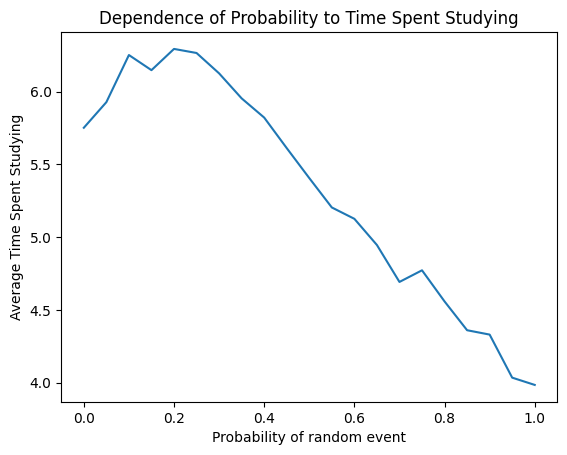

In [20]:
probabilities = np.arange(0, 1.05, 0.05)
avg_times_spent_studying = []

for prob in probabilities:
    times_spent_studying = [main(prob, prnt=False) for _ in range(500)]
    avg_time_spent_studying = sum(times_spent_studying) / len(times_spent_studying)
    avg_times_spent_studying.append(avg_time_spent_studying)

plt.plot(probabilities, avg_times_spent_studying)
plt.xlabel("Probability of random event")
plt.ylabel("Average Time Spent Studying")
plt.title("Dependence of Probability to Time Spent Studying")
plt.show()